In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# Data Loading

In [96]:
data=pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [97]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Common Data Exploration for using Neural Networks

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [99]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [100]:
data.duplicated().sum()

0

In [101]:
data.drop(columns=['Serial No.'],inplace=True)

In [102]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# Train Test Split

In [103]:
X=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [104]:
print(X.shape)
print(y.shape)

(500, 7)
(500,)


In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [106]:
print(X_train.shape)
print(X_test.shape)

(400, 7)
(100, 7)


In [107]:
print(y_train.shape)
print(y_test.shape)

(400,)
(100,)


# Standarizing

IF we know the Upper bound and lower bound of the data then we use MinMax Scaler.

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [109]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [110]:
X_test_scaled

array([[0.46      , 0.48      , 0.25      , 0.375     , 0.25      ,
        0.44140625, 0.        ],
       [0.44      , 0.52      , 0.5       , 0.5       , 0.5       ,
        0.453125  , 1.        ],
       [0.98      , 1.        , 1.        , 0.875     , 0.75      ,
        0.9375    , 0.        ],
       [0.52      , 0.52      , 0.25      , 0.625     , 0.625     ,
        0.5234375 , 1.        ],
       [0.7       , 0.64      , 0.75      , 0.875     , 0.75      ,
        0.6484375 , 1.        ],
       [0.42      , 0.28      , 0.25      , 0.375     , 0.625     ,
        0.40625   , 1.        ],
       [0.6       , 0.4       , 0.5       , 0.5       , 0.625     ,
        0.5625    , 1.        ],
       [0.74      , 0.36      , 0.5       , 0.75      , 0.75      ,
        0.390625  , 1.        ],
       [0.62      , 0.68      , 0.5       , 0.625     , 0.75      ,
        0.59765625, 1.        ],
       [0.56      , 0.48      , 0.25      , 0.75      , 0.75      ,
        0.2421875 , 1. 

# Model

In [111]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense

In [112]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [113]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [114]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [115]:
mew=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0710 - val_loss: 0.0625
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0576 - val_loss: 0.0529
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0448 - val_loss: 0.0453
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0381 - val_loss: 0.0391
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0309 - val_loss: 0.0334
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0259 - val_loss: 0.0284
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - val_loss: 0.0243
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0186 - val_loss: 0.0208
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0189 - val_loss: 0.0180
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - val_loss: 0.0157
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0125 - val_loss: 0.0137
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [116]:
y_pred=model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [117]:
y_pred

array([[0.61668646],
       [0.67030936],
       [0.9597937 ],
       [0.6983876 ],
       [0.80160296],
       [0.63433135],
       [0.73579746],
       [0.66513896],
       [0.7651532 ],
       [0.5727233 ],
       [0.61494154],
       [0.52360123],
       [0.7885379 ],
       [0.7775035 ],
       [0.75133467],
       [0.8422856 ],
       [0.58202183],
       [0.7517957 ],
       [0.9158873 ],
       [0.65051574],
       [0.57909393],
       [0.78136086],
       [0.8430898 ],
       [0.57887375],
       [0.77345794],
       [0.48392597],
       [0.9948905 ],
       [0.60036063],
       [0.8622131 ],
       [0.66086125],
       [0.5969975 ],
       [0.8080712 ],
       [0.55039966],
       [0.9128131 ],
       [0.4217205 ],
       [0.80992013],
       [0.6685602 ],
       [0.5892455 ],
       [0.6125783 ],
       [0.9246302 ],
       [0.52990246],
       [0.6004875 ],
       [0.7973296 ],
       [0.99363655],
       [0.7318154 ],
       [0.47439784],
       [0.646023  ],
       [0.571

In [118]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7657994921889597

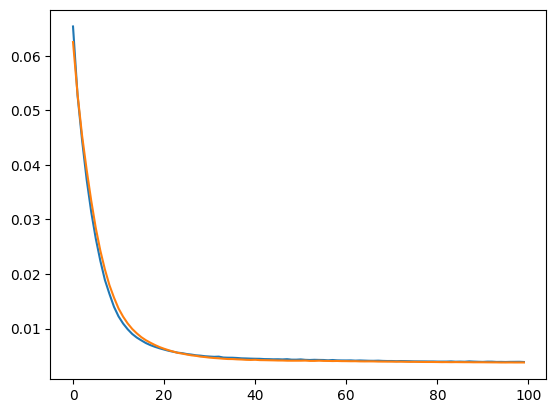

In [119]:
import matplotlib.pyplot as plt
plt.plot(mew.history['loss'])
plt.plot(mew.history['val_loss'])